#### I. Collecting images

This part contains the code used to collect the dataset of images used in the study.

In [1]:
import requests
from lxml import html

In [2]:
import os
import urllib.request
import html
import re
import csv

def download_page(pageUrl):  
    ### a function that downloads the html code of a page
    
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'  
    try:
        page = urllib.request.Request(pageUrl, headers={'User-Agent':user_agent})
        with urllib.request.urlopen(page) as response:
            html1 = response.read().decode('utf-8')
    except:
        print('Error at', pageUrl)
    return html1


In [3]:
from bs4 import BeautifulSoup

In [4]:
url = "https://www.google.com/search?newwindow=1&biw=1456&bih=735&tbm=isch&sa=1&ei=yufyXPefEf6Jk74PgtuWoA0&q=%D0%BF%D0%B0%D0%B4%D0%B0%D1%82%D1%8C+%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D0%BE%D0%BA&oq=%D0%BF%D0%B0%D0%B4%D0%B0%D1%82%D1%8C+%D1%80%D0%B5%D0%B1%D0%B5%D0%BD%D0%BE%D0%BA&gs_l=img.3...32061.32061..32182...0.0..0.62.62.1......0....2j1..gws-wiz-img.eSSr2eLWVts"

In [5]:
soup = BeautifulSoup(download_page(url), 'lxml')
images = soup.find_all(re.compile('img')) #finds all images in html code

In [6]:
i=2081 #image counter
folder = 'bigrams_images/test' # path to the folder where the images are saved


for img in images[1:]:
    with open(folder+str(i)+'.jpeg', 'wb') as f:
        f.write(requests.get(img['src']).content)
        i+=1

#### II. Image processing, obtaining vectors.

This part includes obtaining vectors by image processing


In [7]:
from scipy.misc import imresize
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
from PIL import Image

In [9]:
import numpy as np

In [10]:
from scipy.spatial import distance

Get vectors from color images:

In [11]:
test_sample = ['снег', 'свет', 'звезда', 'цена', 'лист', 'человек', 'температура', 'уровень', 'самолет', 'капля', 'тень', 'скорость']

In [58]:
vectors = []
data  = []
folder = 'bigrams_images/'

for bigram in os.listdir(folder)[2:]:
    for image in os.listdir(folder+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open(folder+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            if (len(np.ravel(np.asarray(img_resized, dtype='uint8'))) == 30000):
                vectors.append(np.ravel(np.asarray(img_resized, dtype='uint8')))
                data.append([bigram, image, np.ravel(np.asarray(img_resized, dtype='uint8'))])


/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [59]:
len(vectors)

1745

Get vectors from black and white images:

In [16]:
vectors_bw = []
data_bw  = []
folder = 'bigrams_images/'

for bigram in test_sample:
    for image in os.listdir(folder+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open(folder+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            arr = np.asarray(img_resized, dtype='uint8')
            try:
                x, y, _ = arr.shape
                k = np.array([[[0.2989, 0.587, 0.114]]])
                arr2 = np.round(np.sum(arr*k, axis=2)).astype(np.uint8).reshape((x, y))
                if (len(np.ravel(arr2)) == 10000):
                    vectors_bw.append(np.ravel(arr2))
                    data_bw.append([bigram, image, np.ravel(arr2)])
            except:
                print(bigram, image)

/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


цена test244.jpeg
цена test259.jpeg
температура test288.jpeg
температура test291.jpeg
скорость test361.jpeg
скорость test362.jpeg
скорость test366.jpeg
скорость test367.jpeg
скорость test369.jpeg
скорость test370.jpeg
скорость test371.jpeg
скорость test373.jpeg
скорость test374.jpeg
скорость test377.jpeg


Get vectors closest to average vector:

In [66]:
data_mean = []
vectors_mean = []
folder = 'bigrams_images/'

for bigram in os.listdir(folder)[2:]:
    vect = []
    arr = 0
    for image in os.listdir(folder+bigram):
        if (image != '.ipynb_checkpoints'):
            img = Image.open('bigrams_images/'+bigram+'/'+image)
            img_resized = imresize(img, (100, 100))
            if (len(np.ravel(np.asarray(img_resized, dtype='uint8'))) == 30000):
                arr+=np.ravel(np.asarray(img_resized, dtype='uint8'))
                vect.append([bigram, image, np.ravel(np.asarray(img_resized, dtype='uint8'))])
                
    mean = arr/len(vect) #average vector
    d = float ( "inf" )
    for v in vect:
        if abs(distance.cosine(v[2], mean)) < d:
            d = abs(distance.cosine(v[2], mean))
            res = v
    data_mean.append(res)
    vectors_mean.append (res[2])

/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [16]:
len(vectors_mean)

12

Saving data to the table:

In [19]:
import pandas as pd

In [68]:
data_mean = pd.DataFrame(data_mean, columns=['word', 'path', 'vector'])

In [69]:
data_mean.head()

,word,path,vector
0,активность,test1668.jpeg,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,акция,test1461.jpeg,"[252, 252, 252, 255, 255, 255, 251, 251, 251, ..."
2,барометр,test1924.jpeg,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,башня,test1406.jpeg,"[158, 185, 215, 157, 184, 214, 157, 184, 214, ..."
4,бомба,test439.jpeg,"[250, 250, 250, 253, 253, 253, 253, 253, 253, ..."


#### III. Clusterisation

In [23]:
from sklearn.cluster import AffinityPropagation

In [24]:
clustering = AffinityPropagation().fit(np.array(vectors))

In [25]:
centers = clustering.cluster_centers_

num = len(centers)  + 1

#for i in range(1, num):
#    plt.subplot(11, 2, i)
 #   img = np.reshape(centers[i-1, :], (100, 300))
 #   plt.imshow(img, cmap='Greys')
 #   plt.axis("off")
 #   plt.grid(None)

In [26]:
len(centers)

13

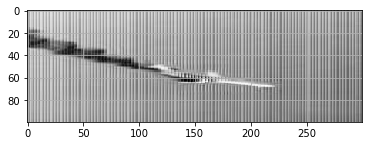

In [32]:
center = np.reshape(centers[8], (100, 300))
plt.imshow(center, cmap='Greys')
plt.grid(None)

In [33]:
data['class'] = clustering.labels_

In [34]:
data.head()

,word,path,vector,class
0,снег,test101.jpeg,"[42, 33, 34, 87, 78, 80, 116, 107, 111, 91, 81...",5
1,снег,test102.jpeg,"[77, 137, 199, 79, 139, 201, 77, 137, 199, 76,...",8
2,снег,test103.jpeg,"[155, 164, 161, 154, 163, 160, 155, 164, 161, ...",8
3,снег,test104.jpeg,"[42, 36, 36, 53, 47, 47, 69, 63, 63, 71, 65, 6...",5
4,снег,test105.jpeg,"[230, 204, 177, 239, 213, 186, 253, 230, 203, ...",5


The distribution of images in the clusters folder:

In [92]:
import shutil

In [56]:
data['new_path'] = data['word'] + '/' + data['path']

In [372]:
source = 'bigrams_images/'
dest = 'with_text/'

for i in range(1, num):
    os.makedirs(dest+str(i))
    for path in data[data['text_class'] == i-1]['new_path']:
        shutil.move(source+path, dest+str(i))

Testing other clustering:

In [551]:
from sklearn.cluster import MeanShift
clustering = MeanShift().fit(np.array(vectors))

In [553]:
len(clustering.cluster_centers_)

4

#### IV. Combinig text and image vectors

In [14]:
f = open('falling_text vectors/falling_wa_ppmi_300_MAC.dm', 'r')

In [15]:
a = f.readlines()

In [16]:
vectors_text = [] #getting vectors for the bigrams with the verb падать 'to fall'
for line in a:
    if line.startswith('падать'):
        w = line.split('\t')
        vectors_text.append([w[0], w[1:]])

Reducing the size of image vectors using SVD method:

In [17]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA


ex = Image.open('bigrams_images/снег/test101.jpeg')
ex_resized = imresize(ex, (100, 100))

arr = np.asarray(ex_resized, dtype='uint8')

ex = np.ravel(arr).reshape(10, 3000)

svd_cv = TruncatedSVD(300)
svd_cv.fit(ex)

/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kata/anaconda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


TruncatedSVD(algorithm='randomized', n_components=300, n_iter=5,
       random_state=None, tol=0.0)

In [70]:
new_vectors = [] #collecting reduced vectors
for vector in data_mean.vector:
    new_vector = svd_cv.transform(vector.reshape(10, 3000))
    new_vectors.append(np.ravel(new_vector))

len(new_vectors)

data_mean['new_vector'] = new_vectors

data_mean.head()

,word,path,vector,new_vector
0,активность,test1668.jpeg,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[13568.1043693384, 593.9698671458054, -815.941..."
1,акция,test1461.jpeg,"[252, 252, 252, 255, 255, 255, 251, 251, 251, ...","[13589.554582204066, 647.8511227799846, -479.6..."
2,барометр,test1924.jpeg,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[13226.6630934473, 776.2583789397105, -1174.43..."
3,башня,test1406.jpeg,"[158, 185, 215, 157, 184, 214, 157, 184, 214, ...","[9383.14725606734, 441.8638509978185, -177.378..."
4,бомба,test439.jpeg,"[250, 250, 250, 253, 253, 253, 253, 253, 253, ...","[12505.30540562911, 680.7588161295664, -566.02..."


For combining images with text:

In [45]:
final_vectors = []
final_data = []

for word in test_sample:
    for img in data[data['word'] == word]['new_vector']:
        for vector in vectors_text:
            if word == vector[0][7:]:
                text_vector = np.array(vector[1])
                final_vectors.append(np.concatenate((img, text_vector), axis = 0))
                final_data.append([word, np.concatenate((img, text_vector), axis = 0)])

For combining text with images:

In [71]:
final_vectors = []
final_data = []
text_vectors = []

for vector in vectors_text:
    word = vector[0][7:]
    for img in data_mean[data_mean['word'] == word]['new_vector']:
        text_vector = np.array(vector[1]) 
        text_vectors.append(text_vector)
        final_vectors.append(np.concatenate((img, text_vector), axis = 0))
        final_data.append([word, np.concatenate((img, text_vector), axis = 0)])
        

In [72]:
final_data = pd.DataFrame(final_data, columns=['word', 'vector'])

In [31]:
from sklearn.cluster import AffinityPropagation

In [87]:
clustering = AffinityPropagation().fit(np.array(text_vectors))

In [88]:
centers = clustering.cluster_centers_

In [89]:
len(centers)

13

In [90]:
final_data['text_class'] = clustering.labels_

In [103]:
for word in final_data[final_data['text_class'] == 12]['word']:
    print(word)

мужик
солдат
лошадь
